# Generate VASP Inputs for Structure Relaxation

In [ ]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19

In [ ]:
from pymatgen.core import Structure
from pymatgen.io.vasp.sets import MPRelaxSet

s = Structure.from_file("ICSD_182730_Si.cif", primitive=True)
custom_settings = {"NELMIN": 5}  # user custom incar settings
relax = MPRelaxSet(s, user_incar_settings=custom_settings)
relax.write_input("Si-relax")

## Get total energy and relaxed structure

In [ ]:
from pymatgen.io.vasp import Vasprun

v = Vasprun("Si-relax/vasprun.xml")
print(v.final_energy)  # final total energy
s = v.final_structure
s.to(filename="Si-relax.cif")  # save relaxed structure into cif file
print(s)  # relaxed structure

-10.8485761 eV
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.876799   3.876799   3.876799
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Si     0.75   0.75   0.75
  1  Si    -0     -0     -0


# Generate VASP Input for Static Run

In [ ]:
from pymatgen.io.vasp.sets import MPStaticSet

custom_settings = {"NELM": 60}  # user custom incar settings
static = MPStaticSet.from_prev_calc(
    "Si-relax/", standardize=True, user_incar_settings=custom_settings
)
static.write_input("Si-static")

## Get total energy from static run

In [ ]:
from pymatgen.io.vasp import Vasprun

v = Vasprun("Si-static/vasprun.xml")
print(v.final_energy)  # final total energy

-10.85000555 eV


# Generate VASP Input for Density of State(DOS) and Band Structure(BS) calculation

In [ ]:
from pymatgen.io.vasp.sets import MPNonSCFSet

# generate uniform k-points for DOS calc.
custom_settings = {"LAECHG": "False", "LVHAR": "False"}  # user custom incar settings
dos = MPNonSCFSet.from_prev_calc(
    "Si-static/",
    mode="uniform",
    reciprocal_density=200,
    user_incar_settings=custom_settings,
)
dos.write_input("Si-dos")

# generate k-points along high symmetry line for band structure calc.
band = MPNonSCFSet.from_prev_calc(
    "Si-static/", mode="line", standardize=True, user_incar_settings=custom_settings
)
band.write_input("Si-band")

## Plot Total DOS

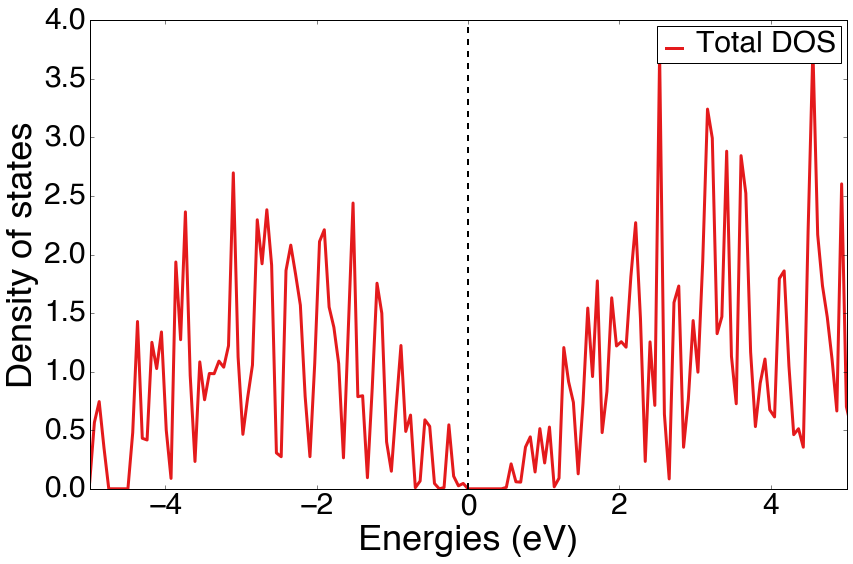

In [ ]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.io.vasp import Vasprun

v = Vasprun("Si-dos/vasprun.xml")
tdos = v.tdos
plotter = DosPlotter()
plotter.add_dos("Total DOS", tdos)
plotter.show(xlim=[-5, 5], ylim=[0, 4])

## Plot element-projected DOS

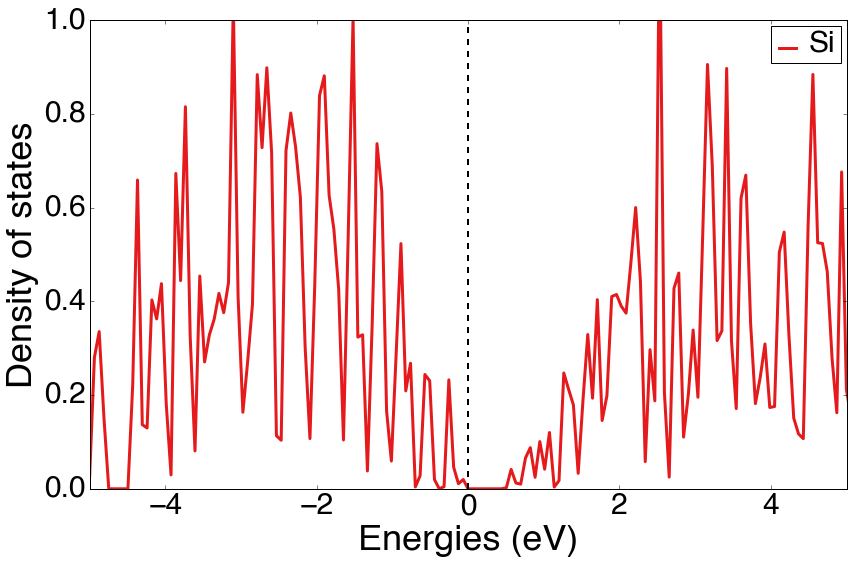

In [ ]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.io.vasp import Vasprun

v = Vasprun("Si-dos/vasprun.xml")
cdos = v.complete_dos
element_dos = cdos.get_element_dos()
plotter = DosPlotter()
plotter.add_dos_dict(element_dos)
plotter.show(xlim=[-5, 5], ylim=[0, 1])

## Plot orbital-projected DOS

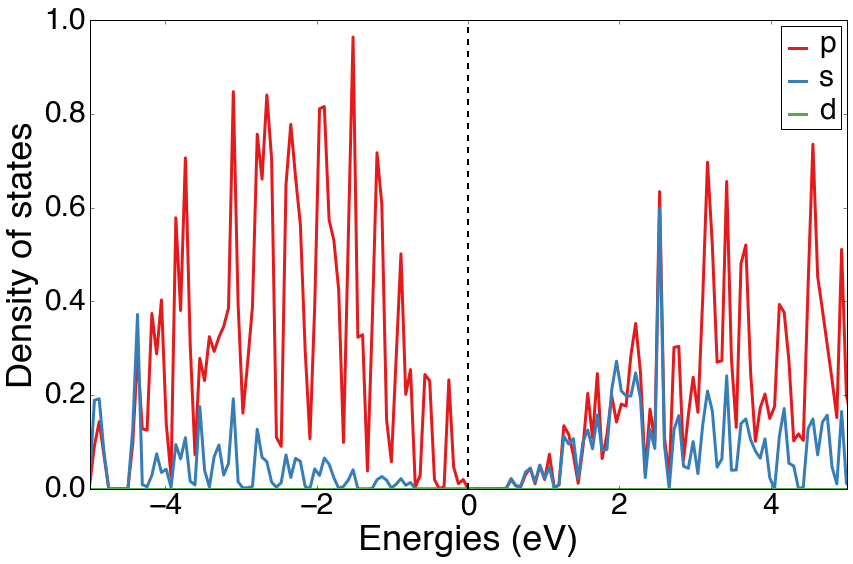

In [ ]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.io.vasp import Vasprun

v = Vasprun("Si-dos/vasprun.xml")
cdos = v.complete_dos
spd_dos = cdos.get_spd_dos()
plotter = DosPlotter()
plotter.add_dos_dict(spd_dos)
plotter.show(xlim=[-5, 5], ylim=[0, 1])

# Plot BS

<module 'matplotlib.pyplot' from '/Users/wzb/.pyenv/versions/3.5.2/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

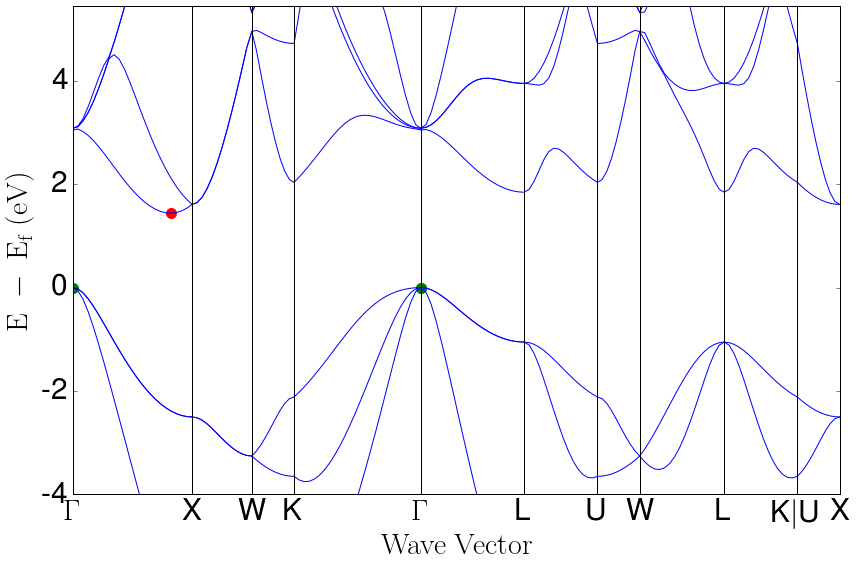

In [ ]:
%matplotlib inline
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.io.vasp import BSVasprun, Vasprun

v = BSVasprun("Si-band/vasprun.xml")
bs = v.get_band_structure(kpoints_filename="Si-band/KPOINTS", line_mode=True)
plt = BSPlotter(bs)
plt.get_plot(vbm_cbm_marker=True)